Classes found: ['Benign', 'Early', 'Pre', 'Pro']
Number of images per class:
Benign: 504
Early: 985
Pre: 963
Pro: 804


C:\Users\94718\AppData\Local\Temp\ipykernel_17920\3330897895.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="Set2")


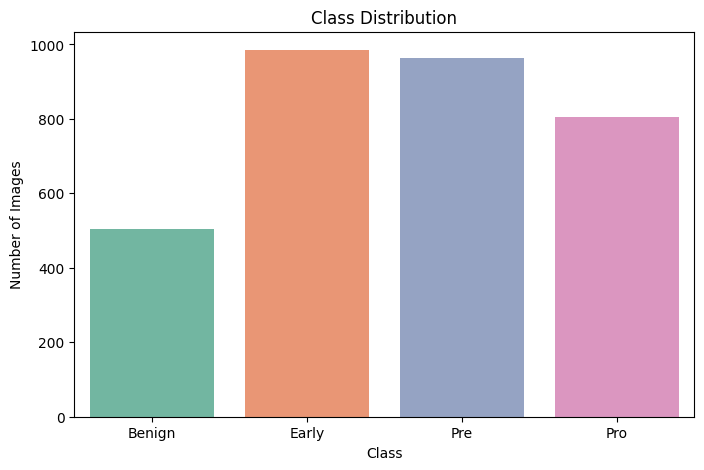

In [ ]:
# -----------------------------
# Step 2: Exploratory Data Analysis
# -----------------------------

# Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd

# Set dataset path
dataset_path = r"C:\Users\94718\OneDrive\Desktop\NIBM\AI\CourseWork\code\try2\Original"  # Replace with your dataset root folder

# 1. Get class names
classes = os.listdir(dataset_path)
print("Classes found:", classes)

# 2. Count images per class
class_counts = {}
image_shapes = []

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    images = os.listdir(cls_path)
    class_counts[cls] = len(images)
    
    # Store shapes
    for img_file in images:
        img_path = os.path.join(cls_path, img_file)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size + (len(img.getbands()),))  # width, height, channels
        except:
            print("Error loading image:", img_path)

# Display class counts
print("Number of images per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Bar plot of class distribution
plt.figure(figsize=(8,5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="Set2")
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()



In [5]:
# 3. Image shapes summary per class
print("\nImage Shape Summary per Class:")

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    cls_shapes = []
    
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        try:
            img = Image.open(img_path)
            cls_shapes.append(img.size + (len(img.getbands()),))  # (Width, Height, Channels)
        except:
            print("Error loading image:", img_path)
    
    cls_shapes_np = np.array(cls_shapes)
    cls_shape_df = pd.DataFrame(cls_shapes_np, columns=["Width", "Height", "Channels"])
    
    print(f"\nClass: {cls}")
    print(cls_shape_df.describe())



Image Shape Summary per Class:

Class: Benign
       Width  Height  Channels
count  504.0   504.0     504.0
mean   224.0   224.0       3.0
std      0.0     0.0       0.0
min    224.0   224.0       3.0
25%    224.0   224.0       3.0
50%    224.0   224.0       3.0
75%    224.0   224.0       3.0
max    224.0   224.0       3.0

Class: Early
       Width  Height  Channels
count  985.0   985.0     985.0
mean   224.0   224.0       3.0
std      0.0     0.0       0.0
min    224.0   224.0       3.0
25%    224.0   224.0       3.0
50%    224.0   224.0       3.0
75%    224.0   224.0       3.0
max    224.0   224.0       3.0

Class: Pre
       Width  Height  Channels
count  963.0   963.0     963.0
mean   224.0   224.0       3.0
std      0.0     0.0       0.0
min    224.0   224.0       3.0
25%    224.0   224.0       3.0
50%    224.0   224.0       3.0
75%    224.0   224.0       3.0
max    224.0   224.0       3.0

Class: Pro
       Width  Height  Channels
count  804.0   804.0     804.0
mean   224.0   2

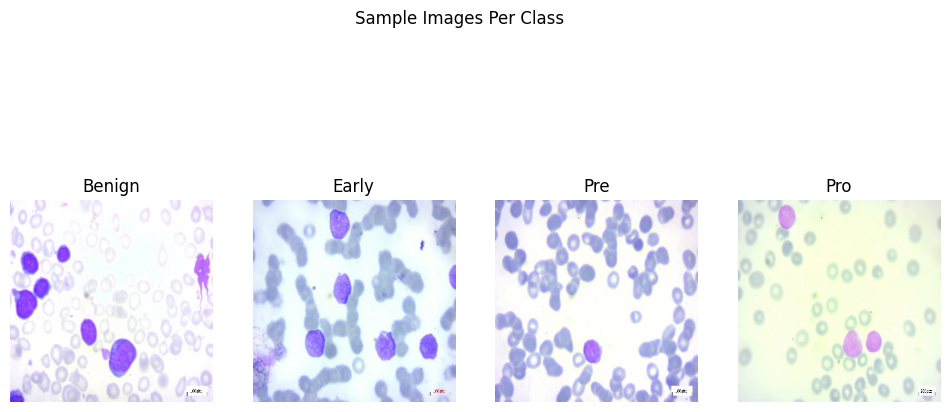

In [6]:
# 4. Sample images per class
plt.figure(figsize=(12,6))
for idx, cls in enumerate(classes):
    cls_path = os.path.join(dataset_path, cls)
    img_file = os.listdir(cls_path)[0]  # pick first image
    img = Image.open(os.path.join(cls_path, img_file))
    plt.subplot(1, len(classes), idx+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
plt.suptitle("Sample Images Per Class")
plt.show()


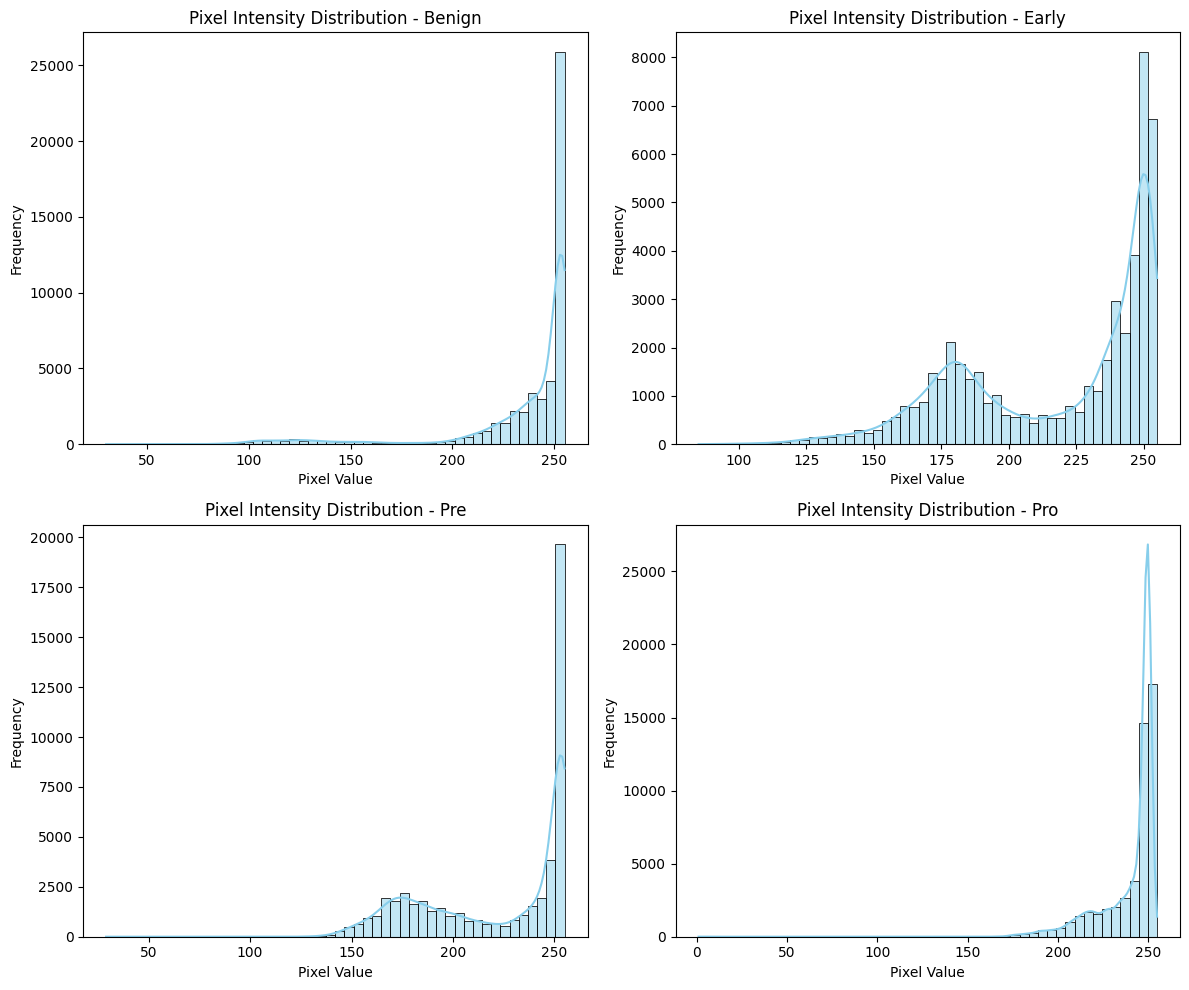

In [7]:
# 5. Pixel intensity distribution per class (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()  # flatten 2x2 grid for easy indexing

for idx, cls in enumerate(classes):
    cls_path = os.path.join(dataset_path, cls)
    img_file = os.listdir(cls_path)[0]  # take the first image
    img = Image.open(os.path.join(cls_path, img_file)).convert("L")  # grayscale
    pixels = np.array(img).flatten()
    
    sns.histplot(pixels, bins=50, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f"Pixel Intensity Distribution - {cls}")
    axes[idx].set_xlabel("Pixel Value")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


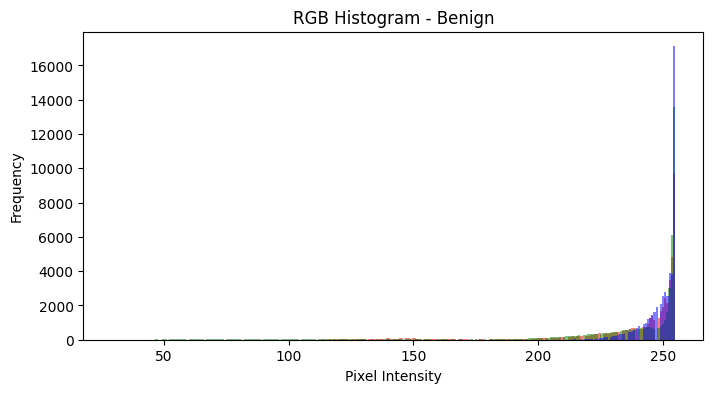

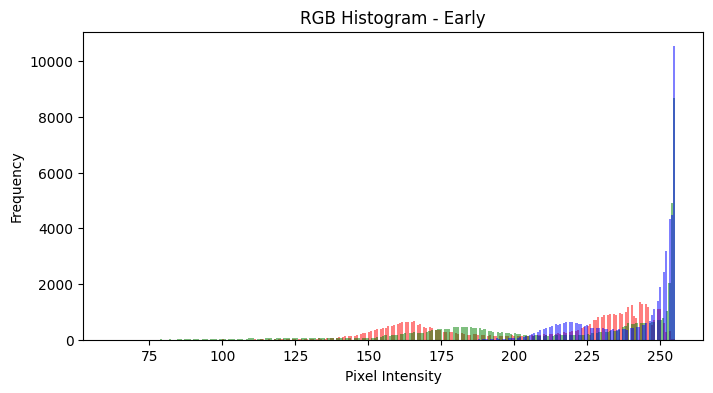

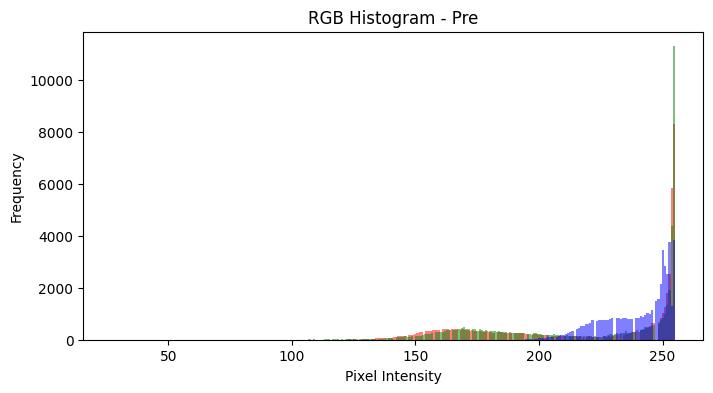

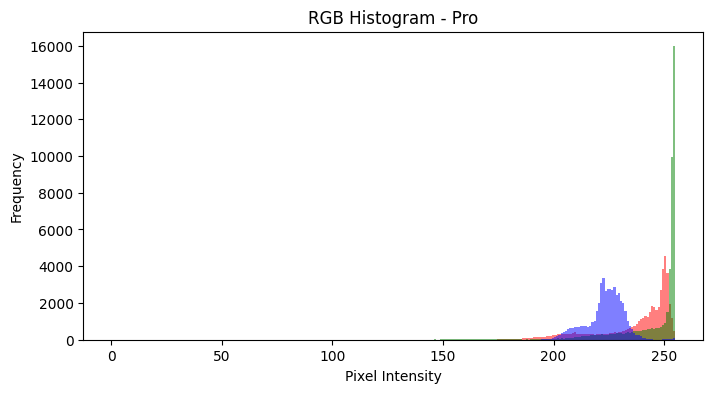

Class: Benign
  Mean (R,G,B): [212.72283858 217.89298605 232.73152365]
  Std (R,G,B): [32.70918465 37.09637695 15.21565996]
Class: Early
  Mean (R,G,B): [208.09139848 216.86380145 237.27990066]
  Std (R,G,B): [34.91291941 38.89585304 16.37780026]
Class: Pre
  Mean (R,G,B): [193.56069663 206.04362788 243.40903095]
  Std (R,G,B): [40.292883   43.4026978  10.71412783]
Class: Pro
  Mean (R,G,B): [231.33212121 233.32415673 241.20978571]
  Std (R,G,B): [25.00028796 25.03235121 12.15194155]

Total images: 3256, Grayscale images: 0


In [8]:

# Path to dataset
#dataset_path = "path_to_dataset"  # Replace with your dataset folder
classes = os.listdir(dataset_path)

# Initialize storage for stats
channel_means = {cls: [] for cls in classes}
channel_stds = {cls: [] for cls in classes}
grayscale_count = 0
total_images = 0

# Loop through dataset
for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        img = Image.open(img_path)
        total_images += 1
        
        # Check if grayscale
        if img.mode == 'L':
            grayscale_count += 1
            img_array = np.array(img)
            # Store stats as one channel
            channel_means[cls].append(np.mean(img_array))
            channel_stds[cls].append(np.std(img_array))
        else:
            img_array = np.array(img.convert("RGB"))
            # Mean and std per channel (R,G,B)
            channel_means[cls].append(img_array.mean(axis=(0,1)))
            channel_stds[cls].append(img_array.std(axis=(0,1)))
            
        # Optional: plot histogram for first image of each class
        if img_file == os.listdir(cls_path)[0]:
            plt.figure(figsize=(8,4))
            if img.mode == 'L':
                plt.hist(img_array.flatten(), bins=256, color='gray')
                plt.title(f"Grayscale Histogram - {cls}")
            else:
                colors = ['r','g','b']
                for i,col in enumerate(colors):
                    plt.hist(img_array[:,:,i].flatten(), bins=256, color=col, alpha=0.5)
                plt.title(f"RGB Histogram - {cls}")
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')
            plt.show()

# Summary statistics
for cls in classes:
    means = np.array(channel_means[cls])
    stds = np.array(channel_stds[cls])
    print(f"Class: {cls}")
    if means.ndim == 1:  # grayscale
        print(f"  Mean: {means.mean():.2f}, Std: {stds.mean():.2f}")
    else:  # RGB
        print(f"  Mean (R,G,B): {means.mean(axis=0)}")
        print(f"  Std (R,G,B): {stds.mean(axis=0)}")

print(f"\nTotal images: {total_images}, Grayscale images: {grayscale_count}")


In [11]:
# Libraries
import os
import cv2
import numpy as np

# Path to dataset
dataset_path = r"C:\Users\94718\OneDrive\Desktop\NIBM\AI\CourseWork\code\try2\Original"
classes = os.listdir(dataset_path)

blur_stats = {}

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    blur_scores = []
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        
        # Load image in grayscale for sharpness detection
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute variance of Laplacian
        laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
        blur_scores.append(laplacian_var)
    
    blur_stats[cls] = {
        "mean_blur_score": np.mean(blur_scores),
        "min_blur_score": np.min(blur_scores),
        "max_blur_score": np.max(blur_scores)
    }

# Print results
for cls, stats in blur_stats.items():
    print(f"Class: {cls}")
    print(f"  Mean Blur Score: {stats['mean_blur_score']:.2f}")
    print(f"  Range: {stats['min_blur_score']:.2f} - {stats['max_blur_score']:.2f}")


Class: Benign
  Mean Blur Score: 637.60
  Range: 84.45 - 1402.02
Class: Early
  Mean Blur Score: 616.88
  Range: 47.29 - 2093.80
Class: Pre
  Mean Blur Score: 419.60
  Range: 77.31 - 1028.57
Class: Pro
  Mean Blur Score: 257.35
  Range: 171.59 - 632.88
